<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [74]:
# Check for GPU
!nvidia-smi

Mon Sep  9 19:11:12 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti     Off |   00000000:2D:00.0  On |                  N/A |
|  0%   56C    P0             33W /  130W |    1478MiB /   6144MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [75]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.4.0+cu124


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

- increase model size - deeper and/or wider model has more capacity for storing underlying patterns in its parameters
- train for longer - maybe the model just needs more time to learn
- get more data - providing model with richer and more diverse set of examples will help if there was not enough of necessary patterns in data that the model should learn

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [76]:
# 1. Get data


In [77]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [78]:
walk_through_dir("/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi")

There are 2 directories and 0 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi'.
There are 3 directories and 0 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in '/home/vertex

In [79]:
# Setup train and testing paths
from pathlib import Path
train_path = Path('/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/train')
test_path = Path('/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/test')

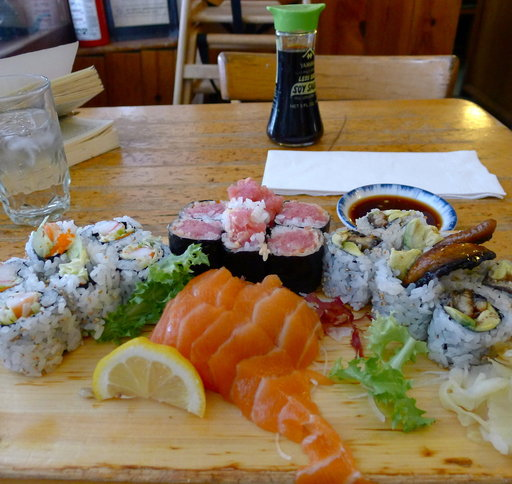

In [80]:
# Visualize an image
from PIL import Image
import random

img_list = list(test_path.glob("sushi/*"))
img_path = random.choice(img_list)
img = Image.open(img_path)
img

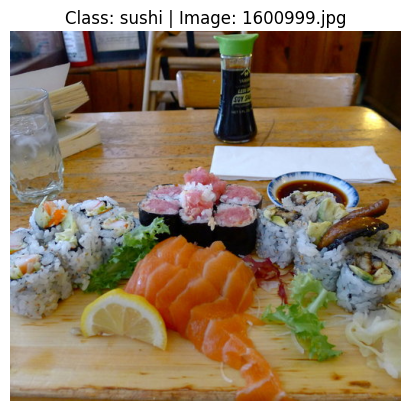

In [81]:
# Do the image visualization with matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot()
ax.axis(False)
ax.set_title(f"Class: {img_path.parent.name} | Image: {img_path.name}")
ax.imshow(np.array(img));

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [82]:
# 3.1 Transforming data with torchvision.transforms
from torchvision.transforms import v2

In [83]:
# Write transform for turning images into tensors
transform = v2.Compose([
    v2.PILToTensor(),
    v2.Resize((64, 64)),
    v2.ToDtype(torch.float32, scale=True)
])
transform(img).shape

torch.Size([3, 64, 64])

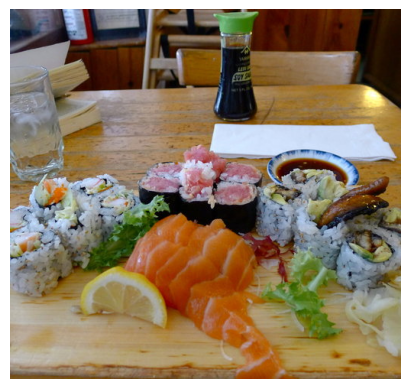

In [84]:
# Write a function to plot transformed images
def plot_img(image):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.axis(False)
    ax.imshow(np.array(img));

plot_img(transform(img))

### Load image data using `ImageFolder`

In [85]:
# Use ImageFolder to create dataset(s)
from torchvision.datasets import ImageFolder
train_data = ImageFolder('/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/train', transform=transform)
test_data = ImageFolder('/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi/test', transform=transform)

In [86]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [87]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [88]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [112]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dl = DataLoader(train_data, shuffle=True, batch_size=32, num_workers=os.cpu_count())
test_dl = DataLoader(test_data, batch_size=32, num_workers=os.cpu_count())

In [113]:
# How many batches of images are in our data loaders?
len(train_dl), len(test_dl)

(8, 3)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [114]:
class TinyVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 10, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(10, 10, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1690, 3)
        )

    def forward(self, x):
        return self.classifier(self.block2(self.block1(x)))

model_0 = TinyVGG().eval()
batch, _ = next(iter(test_dl))
with torch.inference_mode():
    out = model_0(batch)
    
batch.shape, out

(torch.Size([32, 3, 64, 64]),
 tensor([[-0.0392, -0.0242, -0.0052],
         [-0.0411, -0.0199, -0.0029],
         [-0.0404, -0.0275, -0.0034],
         [-0.0392, -0.0227, -0.0005],
         [-0.0350, -0.0178, -0.0002],
         [-0.0398, -0.0204, -0.0071],
         [-0.0387, -0.0178, -0.0048],
         [-0.0406, -0.0195, -0.0063],
         [-0.0419, -0.0182, -0.0029],
         [-0.0371, -0.0184, -0.0055],
         [-0.0396, -0.0193, -0.0073],
         [-0.0389, -0.0193,  0.0030],
         [-0.0360, -0.0244, -0.0060],
         [-0.0355, -0.0222, -0.0032],
         [-0.0381, -0.0216,  0.0016],
         [-0.0366, -0.0234, -0.0012],
         [-0.0399, -0.0219, -0.0019],
         [-0.0384, -0.0271, -0.0010],
         [-0.0399, -0.0205, -0.0006],
         [-0.0389, -0.0258, -0.0013],
         [-0.0370, -0.0251, -0.0007],
         [-0.0393, -0.0173, -0.0005],
         [-0.0361, -0.0294, -0.0090],
         [-0.0370, -0.0245,  0.0030],
         [-0.0402, -0.0214, -0.0033],
         [-0.0361, -

## 4. Create training and testing functions for `model_0`.

In [115]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
    # Put the model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader and data batches
    for batch, labels in dataloader:
     
        # Send data to target device
        batch, labels = batch.to(device), labels.to(device)
        # 1. Forward pass
        out = model(batch)
        # 2. Calculate and accumulate loss
        loss = loss_fn(out, labels)
        train_loss += loss
        # 3. Optimizer zero grad 
        optimizer.zero_grad()
    
        # 4. Loss backward 
        loss.backward()
    
        # 5. Optimizer step
        optimizer.step()
    
        # Calculate and accumualte accuracy metric across all batches
        train_acc += (out.argmax(dim=1) == labels).sum() / len(labels)
    
    # Adjust metrics to get average loss and average accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [116]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
    # Put model in eval mode
    model.eval()

    # Setup the test loss and test accuracy values
    test_loss, test_acc = 0, 0

  # Turn on inference context manager
    with torch.inference_mode():
  
        # Loop through DataLoader batches
        for batch, labels in dataloader:
        # Send data to target device
            batch, labels = batch.to(device), labels.to(device)

        # 1. Forward pass
            out = model(batch)

        # 2. Calculuate and accumulate loss
            test_loss += loss_fn(out, labels)
        # Calculate and accumulate accuracy
            test_acc += (out.argmax(dim=1) == labels).sum() / len(labels)
    
  # Adjust metrics to get average loss and accuracy per batch
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        
    return test_loss, test_acc

In [117]:
from tqdm.auto import tqdm
import pandas as pd

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
    # Create results dictionary
    results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
    
    # Loop through the training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        # Train step
        train_loss, train_acc = train_step(model=model, 
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        # Test step
        test_loss, test_acc = test_step(model=model, 
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn)
        
        # Print out what's happening
        print(f"Epoch: {epoch+1} | "
              f"train_loss: {train_loss:.4f} | "
              f"train_acc: {train_acc:.4f} | "
              f"test_loss: {test_loss:.4f} | "
              f"test_acc: {test_acc:.4f}"
        )
        
        # Update the results dictionary
        results["train_loss"].append(train_loss.detach().cpu().numpy())
        results["train_acc"].append(train_acc.detach().cpu().numpy())
        results["test_loss"].append(test_loss.detach().cpu().numpy())
        results["test_acc"].append(test_acc.detach().cpu().numpy())
        
        # Return the results dictionary
    return pd.DataFrame(results)

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [118]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = TinyVGG().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, train_dl, test_dl, optimizer, loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3116
Epoch: 2 | train_loss: 1.0999 | train_acc: 0.3281 | test_loss: 1.0698 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0871 | train_acc: 0.3633 | test_loss: 1.0811 | test_acc: 0.4924
Epoch: 4 | train_loss: 1.0836 | train_acc: 0.4062 | test_loss: 1.0617 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0666 | train_acc: 0.4180 | test_loss: 1.0649 | test_acc: 0.5540


,train_loss,train_acc,test_loss,test_acc
0,1.1063195,0.3046875,1.098284,0.31155306
1,1.0998845,0.328125,1.0697701,0.5416667
2,1.0870955,0.36328125,1.0810612,0.49242425
3,1.0836439,0.40625,1.0617445,0.5833334
4,1.0666072,0.41796875,1.0648656,0.5539773


In [96]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = TinyVGG().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, train_dl, test_dl, optimizer, loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0919 | train_acc: 0.3911 | test_loss: 1.0721 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.0243 | train_acc: 0.5200 | test_loss: 1.0184 | test_acc: 0.4133
Epoch: 3 | train_loss: 0.9609 | train_acc: 0.5244 | test_loss: 0.9905 | test_acc: 0.4533
Epoch: 4 | train_loss: 0.9170 | train_acc: 0.5733 | test_loss: 0.9788 | test_acc: 0.4400
Epoch: 5 | train_loss: 0.8902 | train_acc: 0.6044 | test_loss: 0.9804 | test_acc: 0.4800
Epoch: 6 | train_loss: 0.8395 | train_acc: 0.6178 | test_loss: 0.9978 | test_acc: 0.4933
Epoch: 7 | train_loss: 0.7989 | train_acc: 0.6533 | test_loss: 1.0318 | test_acc: 0.4267
Epoch: 8 | train_loss: 0.7399 | train_acc: 0.7111 | test_loss: 1.0204 | test_acc: 0.4667
Epoch: 9 | train_loss: 0.6275 | train_acc: 0.7867 | test_loss: 1.2489 | test_acc: 0.4000
Epoch: 10 | train_loss: 0.4944 | train_acc: 0.8044 | test_loss: 1.3035 | test_acc: 0.4800
Epoch: 11 | train_loss: 0.3690 | train_acc: 0.8667 | test_loss: 1.8800 | test_acc: 0.4267
Epoch: 12 | train_l

,train_loss,train_acc,test_loss,test_acc
0,1.0919299,0.39111114,1.0720875,0.41333336
1,1.0242989,0.52000004,1.01837,0.41333336
2,0.96085,0.52444446,0.99046737,0.45333335
3,0.91696405,0.5733333,0.9787688,0.44
4,0.89023644,0.60444444,0.9803557,0.48000002
5,0.8395065,0.61777776,0.9978083,0.49333334
6,0.79890466,0.65333337,1.0317845,0.42666668
7,0.73988146,0.7111111,1.0204197,0.46666667
8,0.6275079,0.7866667,1.248883,0.4
9,0.49439946,0.8044445,1.3035011,0.48000002


In [97]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = TinyVGG().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, train_dl, test_dl, optimizer, loss_fn, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0917 | train_acc: 0.4000 | test_loss: 1.0717 | test_acc: 0.4400
Epoch: 2 | train_loss: 1.0152 | train_acc: 0.5244 | test_loss: 0.9947 | test_acc: 0.5067
Epoch: 3 | train_loss: 0.9725 | train_acc: 0.5156 | test_loss: 0.9764 | test_acc: 0.4933
Epoch: 4 | train_loss: 0.9035 | train_acc: 0.5911 | test_loss: 0.9841 | test_acc: 0.4267
Epoch: 5 | train_loss: 0.8718 | train_acc: 0.5956 | test_loss: 1.0036 | test_acc: 0.4933
Epoch: 6 | train_loss: 0.8482 | train_acc: 0.6400 | test_loss: 1.0140 | test_acc: 0.4400
Epoch: 7 | train_loss: 0.7739 | train_acc: 0.6622 | test_loss: 1.0398 | test_acc: 0.5067
Epoch: 8 | train_loss: 0.7331 | train_acc: 0.6800 | test_loss: 1.0014 | test_acc: 0.4933
Epoch: 9 | train_loss: 0.6261 | train_acc: 0.7556 | test_loss: 1.0478 | test_acc: 0.5200
Epoch: 10 | train_loss: 0.4720 | train_acc: 0.8222 | test_loss: 1.2190 | test_acc: 0.5200
Epoch: 11 | train_loss: 0.3813 | train_acc: 0.8667 | test_loss: 1.5891 | test_acc: 0.4400
Epoch: 12 | train_l

,train_loss,train_acc,test_loss,test_acc
0,1.0916604,0.4,1.0716636,0.44
1,1.0152477,0.52444446,0.99470073,0.50666666
2,0.97251713,0.51555556,0.9763863,0.49333334
3,0.9035125,0.5911111,0.98411256,0.42666668
4,0.8717895,0.59555554,1.003595,0.49333334
5,0.8482445,0.64,1.0139563,0.44
6,0.7739009,0.66222227,1.0398263,0.50666666
7,0.7331041,0.68,1.0014035,0.49333334
8,0.62605435,0.75555557,1.0478387,0.52000004
9,0.4720289,0.82222223,1.2190351,0.52000004


It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [128]:
class TinyVGG2(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(20, 20, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(20, 20, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(20, 20, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1690*2, 3)
        )

    def forward(self, x):
        return self.classifier(self.block2(self.block1(x)))

In [130]:
train_dl = DataLoader(train_data, shuffle=True, batch_size=32, num_workers=os.cpu_count())
test_dl = DataLoader(test_data, batch_size=32, num_workers=os.cpu_count())

In [131]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model2 = TinyVGG2().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)
train(model2, train_dl, test_dl, optimizer, loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1031 | train_acc: 0.2852 | test_loss: 1.1014 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.1017 | train_acc: 0.2930 | test_loss: 1.1017 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1002 | train_acc: 0.2695 | test_loss: 1.0897 | test_acc: 0.5331
Epoch: 4 | train_loss: 1.1094 | train_acc: 0.3086 | test_loss: 1.0910 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0892 | train_acc: 0.4688 | test_loss: 1.0789 | test_acc: 0.5634
Epoch: 6 | train_loss: 1.0625 | train_acc: 0.5664 | test_loss: 1.0784 | test_acc: 0.3816
Epoch: 7 | train_loss: 1.0214 | train_acc: 0.4766 | test_loss: 1.0958 | test_acc: 0.3333
Epoch: 8 | train_loss: 0.9862 | train_acc: 0.5820 | test_loss: 0.9959 | test_acc: 0.4735
Epoch: 9 | train_loss: 0.9825 | train_acc: 0.5469 | test_loss: 1.1140 | test_acc: 0.3438
Epoch: 10 | train_loss: 1.0549 | train_acc: 0.4766 | test_loss: 0.9928 | test_acc: 0.5047
Epoch: 11 | train_loss: 0.9724 | train_acc: 0.5078 | test_loss: 1.0059 | test_acc: 0.4962
Epoch: 12 | train_l

,train_loss,train_acc,test_loss,test_acc
0,1.1031494,0.28515625,1.1013994,0.19791667
1,1.1017312,0.29296875,1.1016896,0.19791667
2,1.10021,0.26953125,1.0896918,0.533144
3,1.1094202,0.30859375,1.0910075,0.2604167
4,1.0891955,0.46875,1.0788718,0.563447
5,1.0624868,0.56640625,1.0784049,0.3816288
6,1.0213684,0.4765625,1.0958443,0.33333334
7,0.9861564,0.58203125,0.99591506,0.47348484
8,0.98254544,0.546875,1.1139512,0.34375
9,1.0549169,0.4765625,0.9928212,0.5047349


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [132]:
!pwd

/home/vertex/Desktop/pytorch-deep-learning/extras/exercises


In [133]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("/home/vertex/Desktop/pytorch-deep-learning/data")
image_path = data_path / "pizza_steak_sushi_20_percent"

# #If the image folder doesn't exist, download it and prepare it... 
# if image_path.is_dir():
#     print(f"{image_path} directory exists.")
# else:
#     print(f"Did not find {image_path} directory, creating one...")
#     image_path.mkdir(parents=True, exist_ok=True)
    
# # Download pizza, steak, sushi data
# with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
#     print("Downloading pizza, steak, sushi 20% data...")
#     f.write(request.content)

# Unzip pizza, steak, sushi data
# with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
#     print("Unzipping pizza, steak, sushi 20% data...") 
#     zip_ref.extractall(image_path)

In [134]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent/train/steak'.
There are 3 directories and 0 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in '/home/vertex/Desktop/pytorch-deep-learning/data/pizza

Excellent, we now have double the training and testing images... 

In [135]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent/train'),
 PosixPath('/home/vertex/Desktop/pytorch-deep-learning/data/pizza_steak_sushi_20_percent/test'))

In [152]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

transform = v2.Compose([
    v2.PILToTensor(),
    v2.Resize((64, 64)),
    v2.ToDtype(torch.float32, scale=True)
])

# Create datasets
train_ds = ImageFolder(train_data_20_percent_path, transform=transform)
test_ds = ImageFolder(test_data_20_percent_path, transform=transform)

# Create dataloaders
train_dl = DataLoader(train_ds, shuffle=True, batch_size=32)
test_dl = DataLoader(test_ds, batch_size=32)

In [153]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = TinyVGG().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, train_dl, test_dl, optimizer, loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1045 | train_acc: 0.3146 | test_loss: 1.0966 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0889 | train_acc: 0.4042 | test_loss: 1.0745 | test_acc: 0.4227
Epoch: 3 | train_loss: 1.0552 | train_acc: 0.4813 | test_loss: 1.0402 | test_acc: 0.4665
Epoch: 4 | train_loss: 0.9813 | train_acc: 0.5312 | test_loss: 0.9800 | test_acc: 0.5392
Epoch: 5 | train_loss: 0.9820 | train_acc: 0.4917 | test_loss: 0.9353 | test_acc: 0.5631
Epoch: 6 | train_loss: 0.8724 | train_acc: 0.6125 | test_loss: 0.9465 | test_acc: 0.5483
Epoch: 7 | train_loss: 0.9392 | train_acc: 0.6063 | test_loss: 0.9355 | test_acc: 0.6102
Epoch: 8 | train_loss: 0.8789 | train_acc: 0.5979 | test_loss: 0.9524 | test_acc: 0.4523
Epoch: 9 | train_loss: 0.8770 | train_acc: 0.5938 | test_loss: 0.9451 | test_acc: 0.5705
Epoch: 10 | train_loss: 0.8885 | train_acc: 0.6021 | test_loss: 0.9309 | test_acc: 0.5693
Epoch: 11 | train_loss: 0.8706 | train_acc: 0.6042 | test_loss: 0.9211 | test_acc: 0.5977
Epoch: 12 | train_l

,train_loss,train_acc,test_loss,test_acc
0,1.1044987,0.31458336,1.0966372,0.2875
1,1.0888815,0.4041667,1.074466,0.42272732
2,1.0551729,0.48125002,1.0402182,0.4664773
3,0.9813062,0.53125,0.9800472,0.53920454
4,0.98200077,0.4916667,0.9352752,0.5630682
5,0.8724167,0.6125,0.94645846,0.54829544
6,0.93918866,0.60625005,0.93553966,0.6102273
7,0.87889814,0.5979167,0.9523668,0.4522727
8,0.87697136,0.59375006,0.94514656,0.57045454
9,0.8885276,0.6020834,0.9309379,0.56931823


## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [166]:
train_ds.classes

['pizza', 'steak', 'sushi']

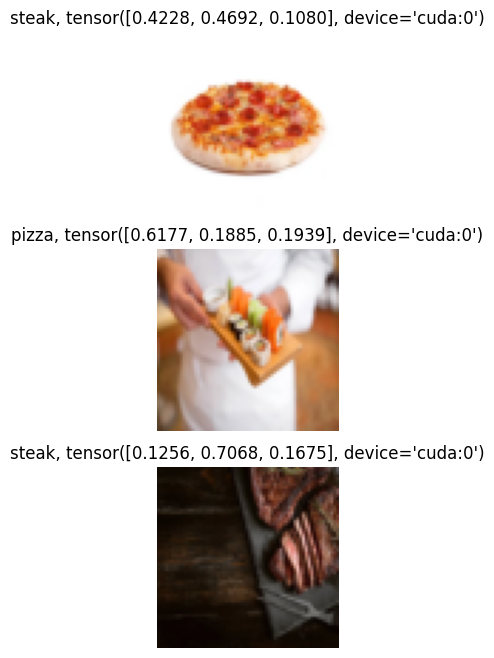

In [188]:
pizza_path = Path('/home/vertex/Desktop/pytorch-deep-learning/data/pizza.jpg')
sushi_path = Path('/home/vertex/Desktop/pytorch-deep-learning/data/sushi.jpg')
steak_path = Path('/home/vertex/Desktop/pytorch-deep-learning/data/steak.jpg')

pizza = transform(Image.open(pizza_path))
sushi = transform(Image.open(sushi_path))
steak = transform(Image.open(steak_path))

batch = torch.stack([pizza, sushi, steak]).to(device)

model.eval()
with torch.inference_mode():
    probs = model(batch).softmax(dim=1)
    preds = probs.argmax(dim=1)

images = [img.permute(1, 2, 0).cpu() for img in [pizza, sushi, steak]]
fig = plt.figure(figsize=(25,8))
for i, tup in enumerate(zip(images, preds, probs)):
    img, idx, prob = tup
    ax = fig.add_subplot(3, 1, i+1)
    ax.axis(False)
    ax.set_title(f"{train_ds.classes[idx]}, {prob}")
    ax.imshow(np.array(img));

The model seems not to get it right, my intuition says that 150 images is just not enough, the model it self however is quite simple, I will try with a model that is more sophisticated and trains better.

In [261]:
import torch.nn.functional as F

transform = v2.Compose([
    v2.PILToTensor(),
    v2.TrivialAugmentWide(),
    v2.Resize((128, 128)),
    v2.ToDtype(torch.float32, scale=True)
])

simple_transform = v2.Compose([
    v2.PILToTensor(),
    v2.Resize((128, 128)),
    v2.ToDtype(torch.float32, scale=True)
])

# Create datasets
train_ds = ImageFolder(train_data_20_percent_path, transform=transform)
test_ds = ImageFolder(test_data_20_percent_path, transform=simple_transform)

# Create dataloaders
train_dl = DataLoader(train_ds, shuffle=True, batch_size=32)
test_dl = DataLoader(test_ds, batch_size=32)

def noop(x):
    return x

In [262]:
class ResBlock(nn.Module):
    def __init__(self, ni, nf, stride=1):
        super().__init__()

        batch_norm = nn.BatchNorm2d(nf)
        batch_norm.weight.data.fill_(0)
        batch_norm.bias.data.fill_(0)
        
        self.convs = nn.Sequential(
            nn.Conv2d(ni, nf, kernel_size=3, stride=stride, padding=1),
            nn.BatchNorm2d(nf),
            nn.ReLU(),

            nn.Conv2d(nf, nf, kernel_size=3, padding=1),
            batch_norm
        )

        self.Iconv = noop if ni == nf else nn.Conv2d(ni, nf, kernel_size=1)
        self.pool = noop if stride == 1 else nn.AvgPool2d(2, ceil_mode=True)

    def forward(self, x):
        # pool goes before Iconv (Identity conv) as it reduces the amount of computations
        return F.relu(self.convs(x) + self.Iconv(self.pool(x)))

In [263]:
class ResNet18(nn.Module):
    def __init__(self, n_out):
        super().__init__()

        self.stem = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(3, stride=2, padding=1)
        )

        self.blocks = nn.Sequential(
            self._make_layer(64, 64, 1),
            self._make_layer(64, 128),
            self._make_layer(128, 256),
            self._make_layer(256, 512)
        )

        self.linear = nn.Linear(512, n_out)

    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = F.adaptive_avg_pool2d(x, 1)
        x = torch.flatten(x, 1)
        return self.linear(x)

    def _make_layer(self, ni, nf, stride=2):
        return nn.Sequential(
            ResBlock(ni, nf, stride=stride),
            ResBlock(nf, nf, stride=1)
        )

In [264]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model = ResNet18(3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, train_dl, test_dl, optimizer, loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0509 | train_acc: 0.4458 | test_loss: 1.0910 | test_acc: 0.3625
Epoch: 2 | train_loss: 0.9480 | train_acc: 0.5583 | test_loss: 1.0642 | test_acc: 0.4500
Epoch: 3 | train_loss: 0.9714 | train_acc: 0.5458 | test_loss: 1.4941 | test_acc: 0.4000
Epoch: 4 | train_loss: 0.9589 | train_acc: 0.5792 | test_loss: 0.8957 | test_acc: 0.5938
Epoch: 5 | train_loss: 0.9601 | train_acc: 0.5438 | test_loss: 0.8941 | test_acc: 0.6267
Epoch: 6 | train_loss: 0.9701 | train_acc: 0.5375 | test_loss: 0.8685 | test_acc: 0.5710
Epoch: 7 | train_loss: 0.9282 | train_acc: 0.5688 | test_loss: 0.8154 | test_acc: 0.6239
Epoch: 8 | train_loss: 0.8890 | train_acc: 0.5792 | test_loss: 0.8525 | test_acc: 0.5892
Epoch: 9 | train_loss: 0.8983 | train_acc: 0.6000 | test_loss: 0.8625 | test_acc: 0.6199
Epoch: 10 | train_loss: 0.8850 | train_acc: 0.5896 | test_loss: 0.9546 | test_acc: 0.5511
Epoch: 11 | train_loss: 0.9180 | train_acc: 0.5833 | test_loss: 0.7359 | test_acc: 0.6744
Epoch: 12 | train_l

,train_loss,train_acc,test_loss,test_acc
0,1.0508926,0.44583336,1.0909952,0.3625
1,0.9479941,0.55833334,1.0642148,0.45000002
2,0.97135645,0.54583335,1.4941021,0.4
3,0.95886564,0.5791667,0.8957146,0.59375
4,0.96011966,0.54375005,0.8940711,0.6267046
5,0.9701072,0.5375,0.8684854,0.57102275
6,0.92816865,0.56875,0.8154034,0.62386364
7,0.8889688,0.5791667,0.8525036,0.58920455
8,0.89832634,0.6,0.8624739,0.61988634
9,0.88497776,0.58958334,0.95458937,0.5511364


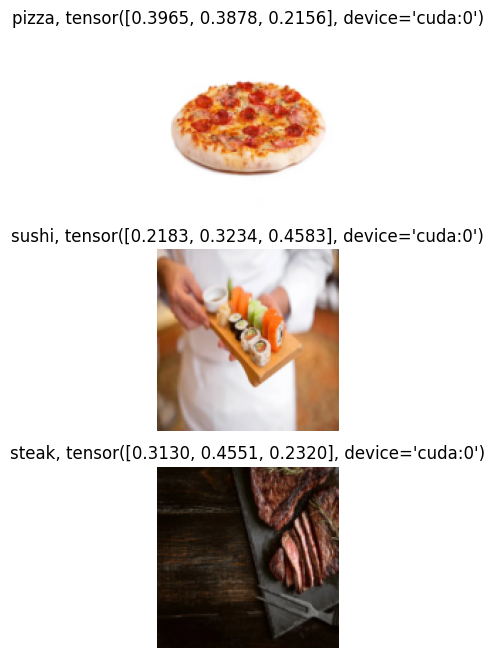

In [265]:
pizza_path = Path('/home/vertex/Desktop/pytorch-deep-learning/data/pizza.jpg')
sushi_path = Path('/home/vertex/Desktop/pytorch-deep-learning/data/sushi.jpg')
steak_path = Path('/home/vertex/Desktop/pytorch-deep-learning/data/steak.jpg')

pizza = simple_transform(Image.open(pizza_path))
sushi = simple_transform(Image.open(sushi_path))
steak = simple_transform(Image.open(steak_path))

batch = torch.stack([pizza, sushi, steak]).to(device)

model.eval()
with torch.inference_mode():
    probs = model(batch).softmax(dim=1)
    preds = probs.argmax(dim=1)

images = [img.permute(1, 2, 0).cpu() for img in [pizza, sushi, steak]]
fig = plt.figure(figsize=(25,8))
for i, tup in enumerate(zip(images, preds, probs)):
    img, idx, prob = tup
    ax = fig.add_subplot(3, 1, i+1)
    ax.axis(False)
    ax.set_title(f"{train_ds.classes[idx]}, {prob}")
    ax.imshow(np.array(img));

That is some improvement, still quite bad though. More data would be needed for better prediction capabilities